# 군집

분류와 달리 정답(종속변수) 레이블이 없는 문제.

- 분류 : KNN
- 군집 : KMeans

데이터를 몇 개의 묶음(클러스터, Cluster)으로 나눌 것인지를 하이퍼 파라미터러 결정하며 이 값이 KMeans의 $K$ 값이됨.

데이터 전처리 단계에서 라벨링을 위해 사용하기도 함.

## #01. 패키지

In [28]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 군집을 위한 패키지
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

## #02. 데이터

**게임 유저 군집화**

게임 이용시간(time spent)과 레벨(game level)을 활용해 `4개의 군집`으로 나누기

1. 오래해서 잘하는 애
2. 오래해도 못하는 애
3. 잠깐 했는데 잘하는 애
4. 잠깐 해서 못하는 애

In [2]:
origin = read_excel("https://data.hossam.kr/G02/game_usage.xlsx")
origin.head()

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


## #03. 데이터 살펴보기

### 게임 이용자의 분포 확인(산점도 그래프)

In [3]:
origin.columns

Index(['time spent', 'game level'], dtype='object')

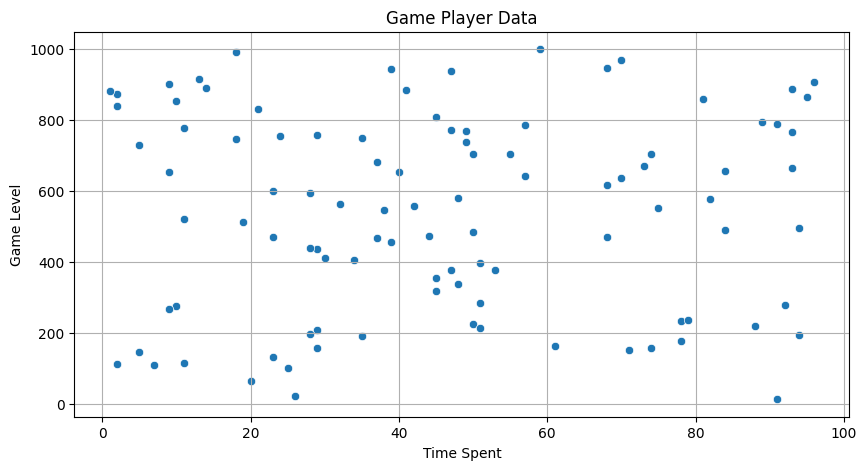

In [4]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='time spent', y = 'game level')
plt.title("Game Player Data")
plt.xlabel("Time Spent")
plt.ylabel("Game Level")

plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델

### 모델 구현

n_clusters : 군집의 갯수, n_init : 초기 중심위치 수, random_state : 시드 값 고정(재현성)

연구 목적이 아닌 실무에서 random_state는 배제

In [10]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=777)
# 학습
kmeans.fit(origin)
# 분류 결과
labels = kmeans.predict(origin)
labels

array([3, 1, 1, 3, 0, 1, 2, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 0, 3, 1, 1, 3,
       0, 1, 0, 3, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 3, 0, 1, 3, 1,
       3, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 3, 0, 1, 3, 2, 0, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 3, 2, 0, 0, 3, 0, 3, 3, 0, 2, 0, 1, 2, 3, 0, 2, 1, 2,
       0, 0, 1, 1, 2, 1, 3, 3, 2, 3, 0, 2])

### 결과를 DF와 병합

In [11]:
df = origin.copy()
df['label'] = labels
df

,time spent,game level,label
0,39,944,3
1,55,705,1
2,29,757,1
3,59,999,3
4,7,109,0
...,...,...,...
95,47,939,3
96,50,485,2
97,13,916,3
98,79,235,0


### 결과 시각화

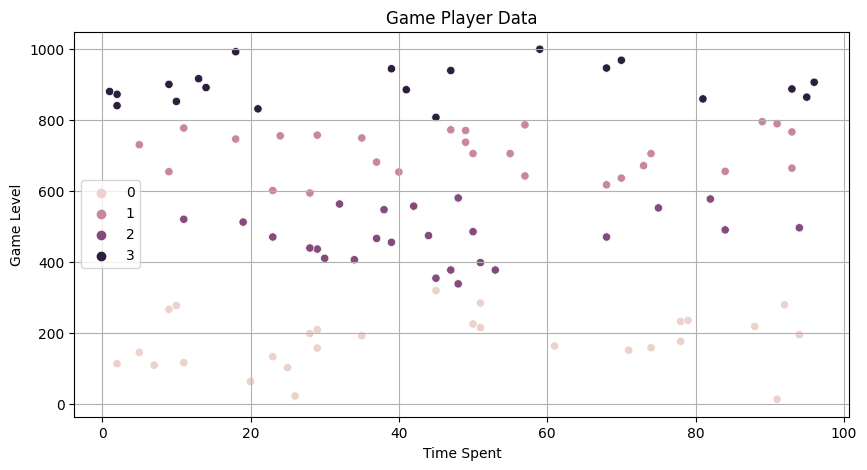

In [13]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x='time spent', y = 'game level', hue='label')
plt.title("Game Player Data")
plt.xlabel("Time Spent")
plt.ylabel("Game Level")

plt.legend()
plt.grid()
plt.show()
plt.close()

## #05. 데이터 표준화

![img](res/sc.png)

### 최대/최소 스케일링

In [15]:
scaler = MinMaxScaler()
scaler.fit(origin)
n_data = scaler.transform(origin)

print("각 열의 평균값 :", n_data[:,0].mean(), n_data[:,1].mean())    #0, 1번째 열 평균
print("각 열의 최소값 :", n_data[:,0].min(), n_data[:,1].min())    #0, 1번째 열 최소
print("각 열의 최대값 :", n_data[:,0].max(), n_data[:,1].max())    #0, 1번째 열 최대

각 열의 평균값 : 0.4731578947368421 0.5324949290060852
각 열의 최소값 : 0.0 0.0
각 열의 최대값 : 1.0 1.0


### 스케일링 결과를 군집화

n_clusters : 군집의 갯수, n_init : 초기 중심위치 수, random_state : 시드 값 고정(재현성)

연구 목적이 아닌 실무에서 random_state는 배제

In [16]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=777)
# 학습
kmeans.fit(n_data)
# 분류 결과
labels = kmeans.predict(n_data)
labels

array([3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 1, 0, 3, 3, 1, 1,
       2, 1, 0, 3, 3, 0, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 1, 3, 1,
       1, 1, 3, 0, 1, 2, 0, 2, 2, 0, 1, 3, 0, 3, 1, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 0, 3, 3, 1, 0, 0, 1, 2, 3, 3, 0, 0, 0, 1, 0, 3, 2, 1, 3, 0,
       0, 2, 3, 1, 0, 3, 1, 3, 0, 3, 2, 0])

### 군집 결과를 DF로 구성

In [17]:
df = DataFrame(n_data, columns=origin.columns)
df['label'] = labels
df

,time spent,game level,label
0,0.400000,0.944219,3
1,0.568421,0.701826,1
2,0.294737,0.754564,3
3,0.610526,1.000000,1
4,0.063158,0.097363,0
...,...,...,...
95,0.484211,0.939148,3
96,0.515789,0.478702,0
97,0.126316,0.915822,3
98,0.821053,0.225152,2


>이걸 시각화

### 군집결과 시각화

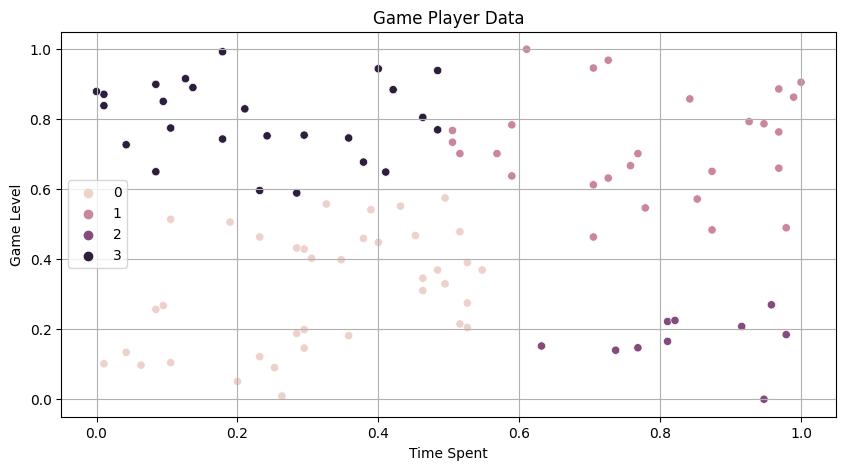

In [18]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x='time spent', y = 'game level', hue='label')
plt.title("Game Player Data")
plt.xlabel("Time Spent")
plt.ylabel("Game Level")

plt.legend()
plt.grid()
plt.show()
plt.close()

> 표준화 후 군집이 변화함

## #06. 군집 평가

### Inertia

KMeans 클러스터링의 성능 지표

각 샘플과 중점이 이동하는 자취 사이의 평균 제곱거리 측정 값

Inertia 값은 클러스터 수와 반비례 관계

클러스터 수를 늘려가면서 반복적으로 실행하면 값이 점점 작아진다

클러스터 수가 늘어감에 Inertia가 급격히 감소하고 어느 지점부터는 완만하게 감소하는 지점이 생기는데 이 지점이 최적 클러스터 수를 의미(=엘보우(Elbow))

In [21]:
iner = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=777)
    # 학습
    kmeans.fit(n_data)
    kmeans.inertia_
    iner.append(kmeans.inertia_)
iner


[10.150300754112473,
 6.184178180480311,
 4.27870825868831,
 3.1342691797329545,
 2.244563434249514,
 1.8141504615008555,
 1.4833082834444848,
 1.2947314814417965,
 1.187736964142487]

### 결과를 보기 쉽게 시각화

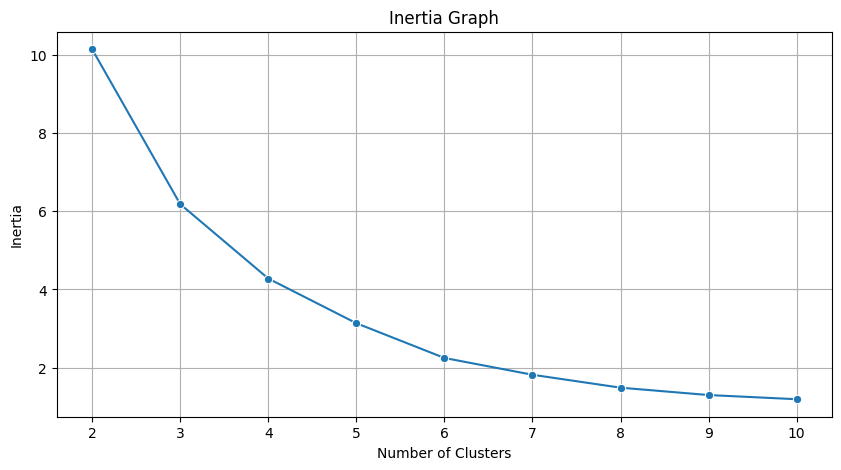

In [23]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11), y=iner, marker='o')
plt.title("Inertia Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.grid()
plt.show()
plt.close()

>x축의 값이 4인 지점부터 감소가 완만하게 진행되는 것으로 보임.
그러므로 최적의 클러스터 수는 `4`로 판단

엄연히 주관인 만큼 다를 수 있음

여기는 Inertia 방법

### 실루엣 점수(계수)

각 군집간의 거리가 얼마나 효율적으로 분리됐는지를 나타내는 지표

효율적 분리 : 어떤 한 점이 다른 군집과는 멀리 떨어져 있고, 동일 군집끼리는 서로 가깝게 잘 뭉쳐있음을 의미

개별 데이터가 같은 군집과는 얼마나 가깝고, 다른 군집의 데이터와는 얼마나 멀리 분리되어 있는가를 나타내는 값

sklearn은 전체 실루엣 점수의 평균값을 반환하는 `silhouette_score()` 함수를 제공

리턴값은 `-1~1`의 범위를 가지며 1에 가까울 수록 좋은 군집으로 판단

`0`인 경우는 클러스터가 겹치는 것을 의미

음수값은 일반적으로 샘플이 잘못된 클러스터에 할당되었음을 의미

> 실루엣 방법은 점수가 나오는 만큼 비교적 더 정확함

In [30]:
# kmeans = KMeans(n_clusters=4, random_state=777)
# # 학습
# kmeans.fit(n_data)
# y_pred = kmeans.predict(n_data)
# score = silhouette_score(n_data, y_pred)

# print("실루엣 점수 : {0:.3f}".format(score))

실루엣 점수 : 0.414


### 실루엣 결과 평가

In [31]:
score_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=777)
    kmeans.fit(n_data)  # 학습
    y_pred = kmeans.predict(n_data) #예측
    score = silhouette_score(n_data, y_pred)    #결과
    score_list.append(score)
score_list

[0.3617202800675718,
 0.39473417105934466,
 0.4144891907182965,
 0.4318795903949567,
 0.46544130770511294,
 0.4581607045900181,
 0.46061321951846396,
 0.46297169733084376,
 0.4313333259160698]

### 결과 시각화

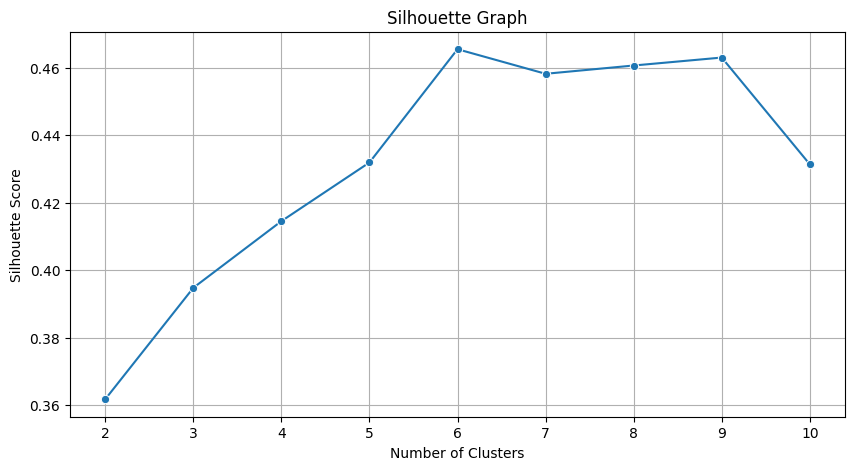

In [32]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11), y=score_list, marker='o')
plt.title("Silhouette Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.grid()
plt.show()
plt.close()

## #07. 최종 군집 평가

실루엣 점수가 가장 높은 6개의 군집으로 클러스터링 수행

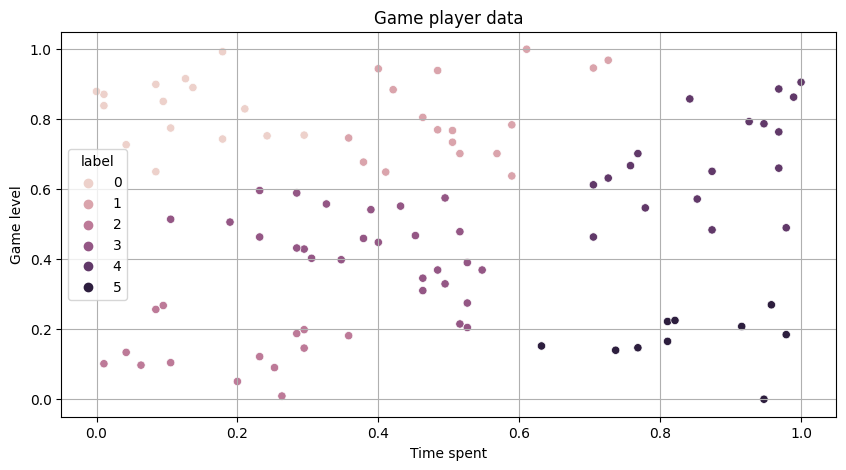

In [33]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300, random_state=777)
kmeans.fit(n_data)
labels = kmeans.predict(n_data)

df = DataFrame(n_data, columns=origin.columns)
df['label'] = labels

plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x='time spent', y='game level', hue='label')
plt.title("Game player data")
plt.xlabel("Time spent")
plt.ylabel("Game level")

plt.grid()
plt.show()
plt.close()